### Sarcasm Dataset

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-02-16 15:50:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.16
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  6.07MB/s    in 0.9s    

2021-02-16 15:50:26 (6.07 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [5]:
with open('/tmp/sarcasm.json', 'r') as f:
    datastore = json.load(f)
    
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [6]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                               padding = padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                              padding = padding_type, truncating = trunc_type)

In [22]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [25]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.5637 - acc: 0.7064 - val_loss: 0.4036 - val_acc: 0.8258
Epoch 2/30
625/625 - 1s - loss: 0.3177 - acc: 0.8697 - val_loss: 0.3444 - val_acc: 0.8553
Epoch 3/30
625/625 - 1s - loss: 0.2402 - acc: 0.9059 - val_loss: 0.3432 - val_acc: 0.8504
Epoch 4/30
625/625 - 1s - loss: 0.1931 - acc: 0.9266 - val_loss: 0.3541 - val_acc: 0.8554
Epoch 5/30
625/625 - 1s - loss: 0.1609 - acc: 0.9395 - val_loss: 0.4000 - val_acc: 0.8427
Epoch 6/30
625/625 - 1s - loss: 0.1366 - acc: 0.9511 - val_loss: 0.4064 - val_acc: 0.8492
Epoch 7/30
625/625 - 1s - loss: 0.1172 - acc: 0.9595 - val_loss: 0.4364 - val_acc: 0.8444
Epoch 8/30
625/625 - 1s - loss: 0.1022 - acc: 0.9651 - val_loss: 0.4743 - val_acc: 0.8390
Epoch 9/30
625/625 - 1s - loss: 0.0880 - acc: 0.9706 - val_loss: 0.5156 - val_acc: 0.8362
Epoch 10/30
625/625 - 1s - loss: 0.0767 - acc: 0.9757 - val_loss: 0.5596 - val_acc: 0.8338
Epoch 11/30
625/625 - 1s - loss: 0.0663 - acc: 0.9797 - val_loss: 0.6068 - val_acc: 0.8289
Epoch 12

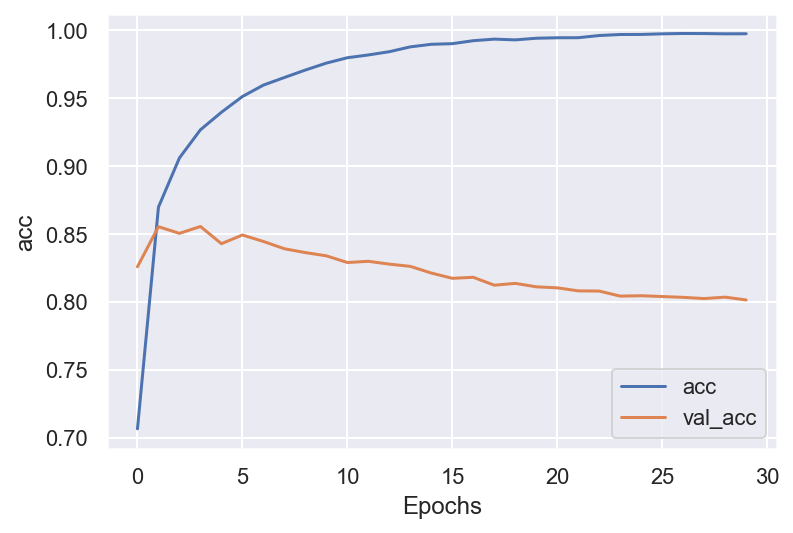

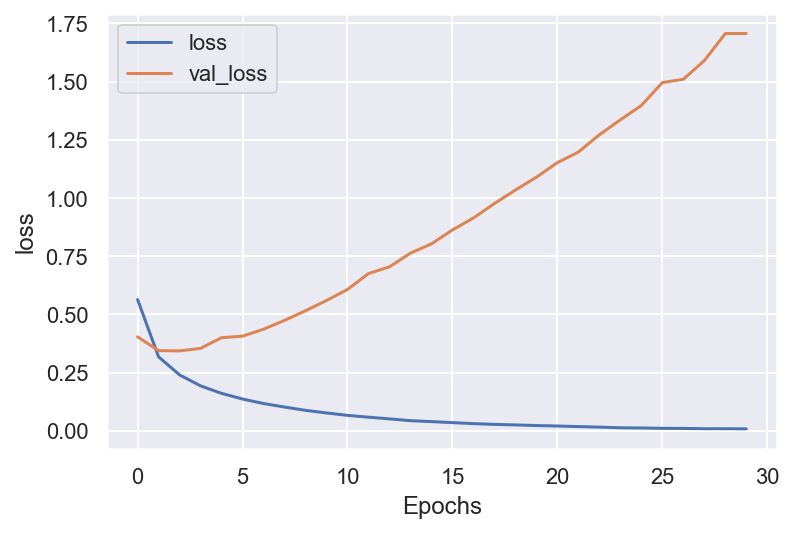

In [27]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "acc")
plot_graphs(history, "loss")